# **Introduction**

In this project, I will analyze GDP and life expectancy data from the World Health Organization and the World Bank to examine the relationship between GDP and life expectancy in six countries.
I will prepare and visualize the data to explore trends over time and investigate how changes in GDP correspond to changes in life expectancy.
Specifically, I will address the following questions:

- How has life expectancy changed over the years?

- How has GDP changed over the years?

- What is the relationship between GDP and life expectancy

### **Data sources**

GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [206]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [207]:
# Load and view first five rows
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The column name "Life expectancy at birth (years)" is lengthy and should be abbreviated to simplify coding.

In [208]:
df.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)

In [209]:
# Get general overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


The dataset contains 96 rows and 4 columns:
- Country – the name of the country (string)
- Year – the year of observation (integer)
- LEABY – Life Expectancy at Birth in years (float)
-GDP – Gross Domestic Product (float)

All columns are complete with no missing values, and the dataset uses minimal memory (~3.1 KB).

In the next three cells I will continue to find more information about the Dataframe 

In [210]:
df["Country"].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [211]:
df["Country"].value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

The DataFrame is clean and properly structured, so I’m ready to begin analysis.

I will begin by analyzing the average life expectancy and average GDP of six countries across a six-year period.

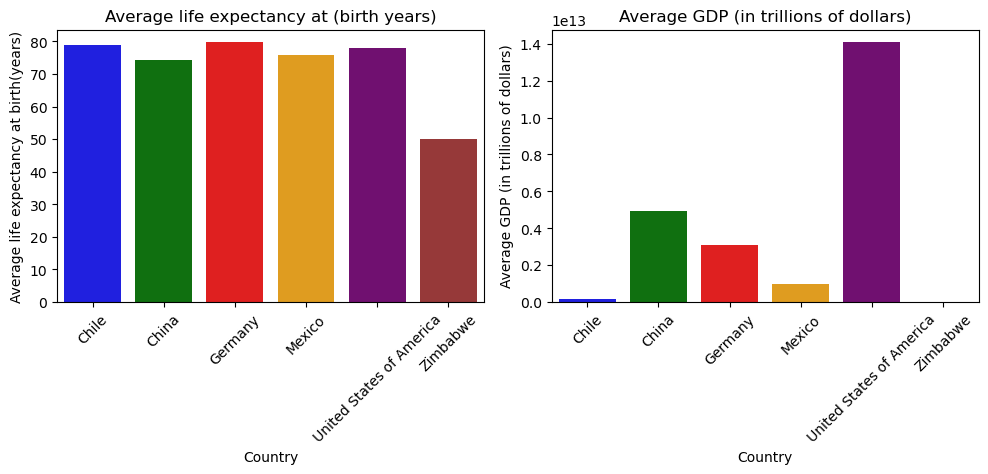

In [216]:
colors = {
    "Chile": "blue",
    "China": "green",
    "Germany": "red",
    "Mexico": "orange",
    "United States of America": "purple",
    "Zimbabwe": "brown"
}

plt.figure(figsize=(10, 5))

# Subplot 1: Life Expectancy
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x="Country", y="LEABY", data=df, palette=colors, errorbar=None, ax=ax1, hue="Country")
ax1.set_xlabel("Country")
ax1.set_ylabel("Average life expectancy at birth(years)")
ax1.set_title("Average life expectancy at (birth years)")
ax1.tick_params(axis='x', rotation=45)

# Subplot 2: GDP
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x="Country", y="GDP", data=df, palette=colors, errorbar=None, ax=ax2, hue="Country")
ax2.set_xlabel("Country")
ax2.set_ylabel("Average GDP (in trillions of dollars)")
ax2.set_title("Average GDP (in trillions of dollars)")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


As shown in the graphs, life expectancy varies across the six countries.

- Germany, Chile, and the United States of America record the highest life expectancies, close to or above 80 years.

- Zimbabwe has the lowest, around 50 years.

- China and Mexico fall in the mid‑range, with life expectancies between these extremes.

  

In terms of GDP, the disparities are even more pronounced.

- The United States of America has a dramatically higher GDP than all other countries — nearly 14 trillion dollars, dwarfing the rest.

- China and Germany follow with moderate GDP levels, reflecting their strong industrial and economic bases.

- Chile, Mexico, and Zimbabwe have much lower GDPs, with Zimbabwe at the bottom, indicating limited economic output.

Next, I examine the life expectancy and GDP over the years

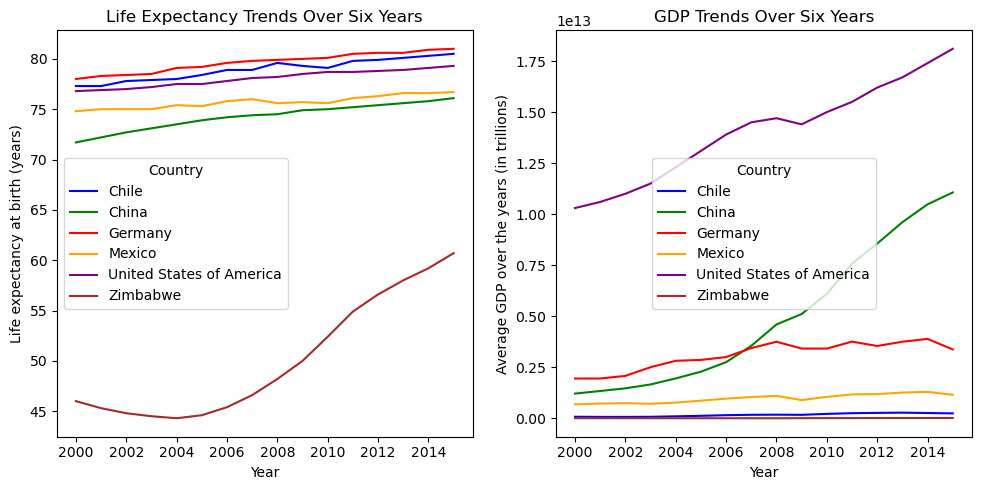

In [225]:
plt.figure(figsize=(10,5))

# Subplot 1: Life Expectancy
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="LEABY", data=df, hue="Country", palette=colors)
ax1.set_xlabel("Year")
ax1.set_ylabel("Life expectancy at birth (years)")
ax1.set_title("Life Expectancy Trends Over Six Years")

# Subplot 2: GDP
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x="Year", y="GDP", data=df, hue="Country", palette=colors)
ax2.set_xlabel("Year")
ax2.set_ylabel("Average GDP over the years (in trillions)")
ax2.set_title("GDP Trends Over Six Years")

# Final layout and display
plt.tight_layout()
plt.show()



### **Life Expectancy Trends (Left Plot)**
- Germany, Chile, and the USA maintain consistently high life expectancy (above 75 years)

- China and Mexico show moderate but steady improvements, hovering in the low 70s.

- Zimbabwe starts very low (~45 years in 2000) but shows a remarkable upward trend, reaching over 60 years by 2015


### **GDP Trends (Right Plot)**
- USA dominates with the highest GDP, maintaining a steep upward trajectory.

- China’s GDP grows rapidly, reflecting its economic boom during this period.

- Germany shows steady growth, while Chile and Mexico remain relatively flat.

- Zimbabwe has the lowest GDP, with minimal growth — reinforcing its economic challenges.


Next, I examine the relationship between life expectancy at birth and GDP across the six‑year period.

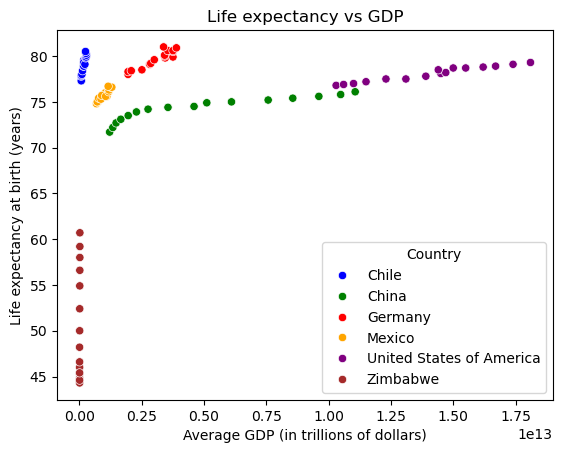

In [233]:
sns.scatterplot(x="GDP", y="LEABY", data=df, hue="Country", palette=colors)
plt.xlabel("Average GDP (in trillions of dollars)")
plt.ylabel("Life expectancy at birth (years)")
plt.title("Life expectancy vs GDP")
plt.show()


The Life expectancy vs GDP graph above shows that as GDP increases, life expectancy tends to rise.
The pattern holds across diverse economies — from developed (USA, Germany) to developing (Zimbabwe, Mexico).

Next, I examine the relationship between GDP and life expectancy at birth for each country individually

In [219]:
# Create sub dataframe for each country
df_chile = df[df["Country"]== "Chile"]
df_china = df[df["Country"]=="China"]
df_germany = df[df["Country"]=="Germany"]
df_mexico = df[df["Country"]=="Mexico"]
df_usa = df[df["Country"]=="United States of America"]
df_zimbabwe = df[df["Country"]=="Zimbabwe"]

<Figure size 1400x1000 with 0 Axes>

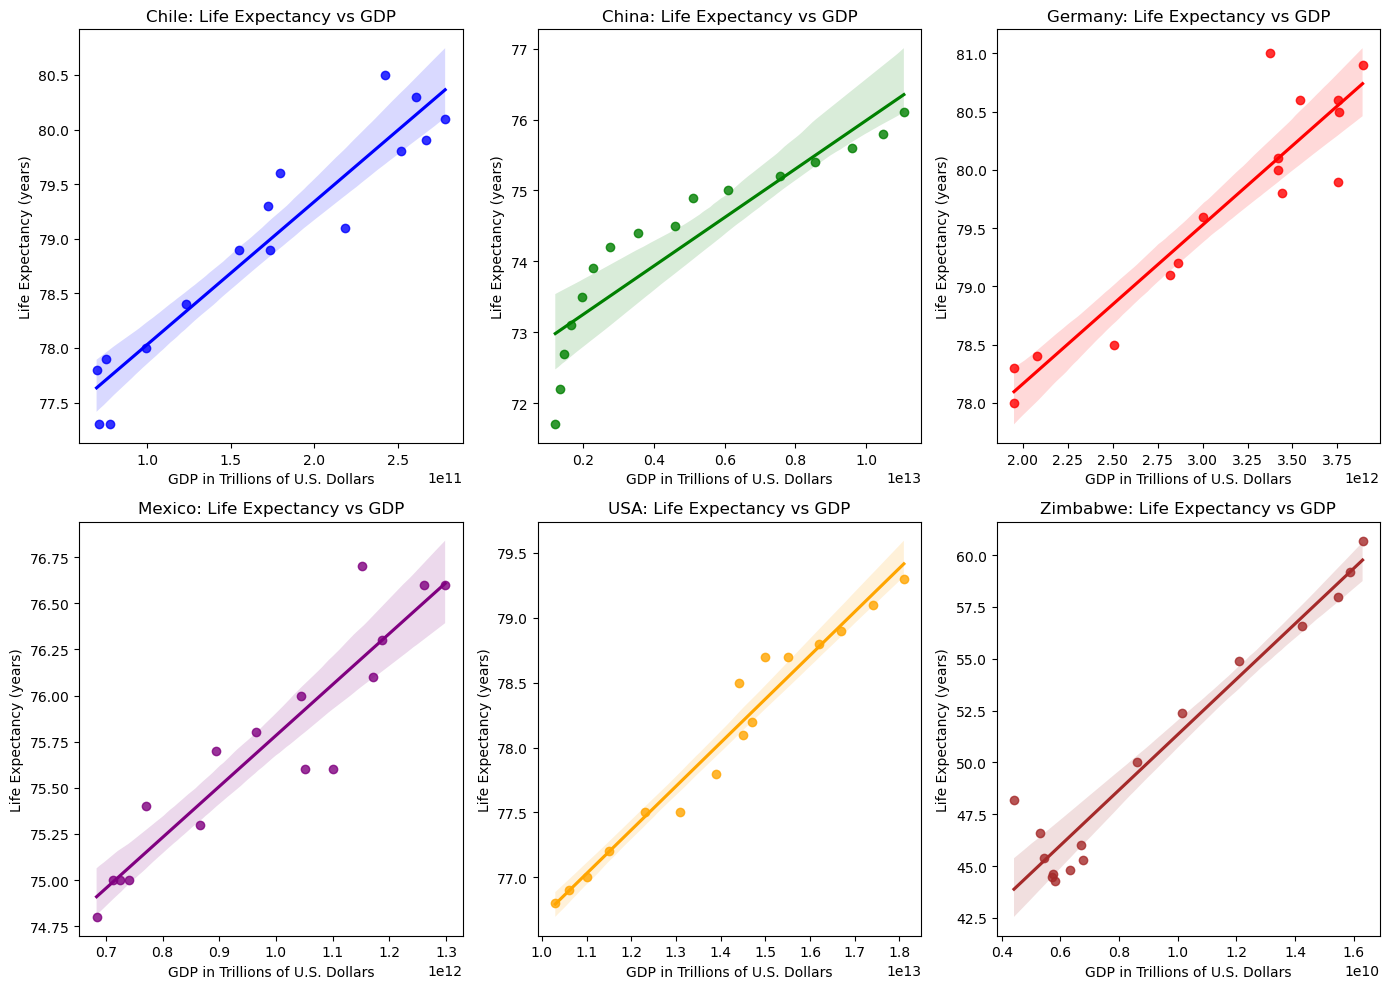

In [223]:
# Create the figure
plt.figure(figsize=(14, 10))

plt.figure(figsize=(14, 10))

# Subplot 1 - Chile
ax1 = plt.subplot(2, 3, 1)
sns.regplot(x="GDP", y="LEABY", data=df_chile, ax=ax1,
            scatter_kws={"color":"blue"}, line_kws={"color":"blue"})
ax1.set_xlabel("GDP in Trillions of U.S. Dollars")
ax1.set_ylabel("Life Expectancy (years)")
ax1.set_title("Chile: Life Expectancy vs GDP")

# Subplot 2 - China
ax2 = plt.subplot(2, 3, 2)
sns.regplot(x="GDP", y="LEABY", data=df_china, ax=ax2,
            scatter_kws={"color":"green"}, line_kws={"color":"green"})
ax2.set_xlabel("GDP in Trillions of U.S. Dollars")
ax2.set_ylabel("Life Expectancy (years)")
ax2.set_title("China: Life Expectancy vs GDP")

# Subplot 3 - Germany
ax3 = plt.subplot(2, 3, 3)
sns.regplot(x="GDP", y="LEABY", data=df_germany, ax=ax3,
            scatter_kws={"color":"red"}, line_kws={"color":"red"})
ax3.set_xlabel("GDP in Trillions of U.S. Dollars")
ax3.set_ylabel("Life Expectancy (years)")
ax3.set_title("Germany: Life Expectancy vs GDP")

# Subplot 4 - Mexico
ax4 = plt.subplot(2, 3, 4)
sns.regplot(x="GDP", y="LEABY", data=df_mexico, ax=ax4,
            scatter_kws={"color":"purple"}, line_kws={"color":"purple"})
ax4.set_xlabel("GDP in Trillions of U.S. Dollars")
ax4.set_ylabel("Life Expectancy (years)")
ax4.set_title("Mexico: Life Expectancy vs GDP")

# Subplot 5 - USA
ax5 = plt.subplot(2, 3, 5)
sns.regplot(x="GDP", y="LEABY", data=df_usa, ax=ax5,
            scatter_kws={"color":"orange"}, line_kws={"color":"orange"})
ax5.set_xlabel("GDP in Trillions of U.S. Dollars")
ax5.set_ylabel("Life Expectancy (years)")
ax5.set_title("USA: Life Expectancy vs GDP")

# Subplot 6 - Zimbabwe
ax6 = plt.subplot(2, 3, 6)
sns.regplot(x="GDP", y="LEABY", data=df_zimbabwe, ax=ax6,
            scatter_kws={"color":"brown"}, line_kws={"color":"brown"})
ax6.set_xlabel("GDP in Trillions of U.S. Dollars")
ax6.set_ylabel("Life Expectancy (years)")
ax6.set_title("Zimbabwe: Life Expectancy vs GDP")

plt.tight_layout()
plt.show()


### **Conclusion**
Across most of the countries studied, GDP has shown growth over the six‑year period, with China experiencing the highest increase. Life expectancy has also risen during this time, with Zimbabwe recording the largest improvement. The visualizations clearly suggest a positive relationship between GDP and life expectancy: nations with higher economic output tend to have longer average lifespans.

### **Further Research**
It is important to emphasize that correlation does not imply causation. While GDP and life expectancy appear linked, further research is needed to investigate the underlying factors driving this relationship — such as healthcare investment, education, infrastructure, and social policies — to better understand the mechanisms at play. this positive relationship.